In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
# Example usage
data = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 16, 15, 13, 11, 9, 7, 5, 3, 1, 0, 1, 3, 5, 7, 9, 11, 13, 15, 16, 17])

In [104]:
class Burg_AR:
    def __init__(self, n_AR = 5):
        self.coeffs = np.zeros(n_AR)
        self.r = n_AR
        self._train_MAE = 0
        self._train_R2 = 0
        self._train_delta = 0
        self._data = 0
    
    def fit(self, data):
        self._data = data
        N = len(data)-1
        # initialize Ak
        Ak    = np.zeros(self.r + 1)
        Ak[0] = 1.0 
        # initialize f and b.
        f  = data.copy()
        b = data.copy()
        # Initialize Dk
        Dk = 0.0
        for j in range(N+1):
            Dk += 2.0 * f[j] ** 2 
        Dk -= (f[0] ** 2) + (b[N] ** 2) 
        #Burg recursion
        for k in range(self.r):
            # compute mu
            mu = 0.0;
            for n in range(N-k):
                mu += f[n+k+1] * b[n]
            mu *= -2.0 / Dk
            # update Ak
            maxn = (k+1)//2 + 1 # rounds down 
            for n in range(maxn):
                t1 = Ak[n] + mu * Ak[k+1-n]
                t2 = Ak[k+1-n] + mu * Ak[n]
                Ak[n] = t1
                Ak[k+1-n] = t2
            #update f and b
            for n in range(N-k):
                t1 = f[n+k+1] + mu * b[n]
                t2 = b[n] + mu * f[n+k+1]
                f[n+k+1] = t1
                b[n] = t2
            #update Dk
            Dk = ( 1.0 - mu ** 2) * Dk - (f[k+1] ** 2) - (b[N-k-1] ** 2)
        # assign coefficients.
        self.coeffs[:] = Ak[1:]
        
        # predict train array
        pred_train = np.zeros((N - self.r))
        for n in range(N - self.r):
            pred_train[n] = data[n:(n+self.r)].dot(-self.coeffs)
        
        # compute train errors
        error = data[self.r+1:] - pred_train
        self._train_delta = np.sum(error**2) / np.sum(data[self.r]**2)
        self._train_MAE = np.sum(error**2) / (N - self.r)
        self._train_R2 = 1 - np.sum(error**2)/np.sum((pred_train - np.mean(data[self.r:]))**2)
        
    def predict(self, n_future = 1):
        predicted = np.zeros(n_future)
        full_series = self._data
        for h in range(n_future):
            predicted[h] = full_series[-1-self.r:-1].dot(-self.coeffs)
            full_series = np.append(full_series, np.array(predicted[h]))
        return predicted, full_series
        
    def __str__(self):
        return f"""Model coefficients for AR model is: coeffs = {self.coeffs} \n\/
        MAE for train data is: MAE = {self._train_MAE} \n\/
        delta for train data is: delta = {self._train_delta} \n\/
        R2 for train data is: R2 = {self._train_R2}"""        

model = Burg_AR(17)

In [105]:
model.fit(data)
print(model)

Model coefficients for AR model is: coeffs = [-1.4272116   0.49751471 -0.03546117 -0.01901264  0.01904244 -0.01961596
  0.01963341 -0.02017224  0.02007824 -0.02057538  0.02037182 -0.02086782
  0.02065307 -0.02114764  0.0201602  -0.01412559  0.        ] 
\/
        MAE for train data is: MAE = 1.1965883544172569 
\/
        delta for train data is: delta = 13.162471898589827 
\/
        R2 for train data is: R2 = 0.9637164898428221


In [106]:
predicted, full_series = model.predict(5)

In [107]:
import matplotlib.pyplot as plt

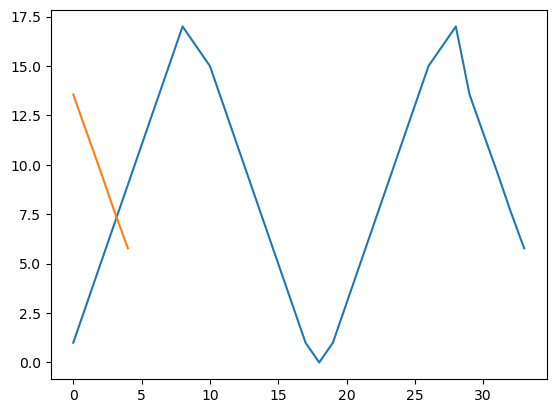

In [108]:
plt.plot(full_series)
plt.plot(predicted)